In [21]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score
import pandas as pd
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold
from sklearn.preprocessing import MinMaxScaler
import numpy as np

In [5]:
dataset = pd.get_dummies(pd.read_csv("./ManualPreprocessedAmesHousingClassification.csv"))
X = dataset.drop(columns=["SalePrice"])
y = dataset["SalePrice"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)

In [8]:
# Linear Regression on Categorizated Data
kFold = KFold(n_splits=10, shuffle=True, random_state=0)
avgMSE = 0
avgR2 = 0
for train, test in kFold.split(X_train):
    X_train_fold, X_test_fold = X_train.iloc[train], X_train.iloc[test]
    y_train_fold, y_test_fold = y_train.iloc[train], y_train.iloc[test]
    model = LinearRegression()
    model.fit(X_train_fold, y_train_fold)
    y_pred = model.predict(X_test_fold)
    avgMSE += mean_squared_error(y_test_fold, y_pred)
    avgR2 += model.score(X_test_fold, y_test_fold)
print("Average MSE: ", avgMSE/10)
print("Average R2: ", avgR2/10)

Average MSE:  0.27222205861643856
Average R2:  0.7789091811888553


In [13]:
# Linear Regression on Original Data
kFold = KFold(n_splits=10, shuffle=True, random_state=0)
dataset_orig = pd.get_dummies(pd.read_csv("./ManualPreprocessedAmesHousing.csv"))
X_orig = dataset_orig.drop(columns=["SalePrice"])
y_orig = dataset_orig["SalePrice"]
kFold = KFold(n_splits=10, shuffle=True, random_state=0)
avgMSE = 0
avgR2 = 0
for train, test in kFold.split(X_orig):
    X_train_fold, X_test_fold = X_orig.iloc[train], X_orig.iloc[test]
    y_train_fold, y_test_fold = y_orig.iloc[train], y_orig.iloc[test]
    model = LinearRegression()
    model.fit(X_train_fold, y_train_fold)
    y_pred = model.predict(X_test_fold)
    avgMSE += mean_squared_error(y_test_fold, y_pred)
    avgR2 += model.score(X_test_fold, y_test_fold)
print("Average MSE: ", avgMSE/10)
print("Average R2: ", avgR2/10)

Average MSE:  935.6220729544648
Average R2:  0.8555372323665559


In [9]:
# SGD Classifier
kFold = KFold(n_splits=10, shuffle=True, random_state=0)
avgAccuracy = 0
for train, test in kFold.split(X_train):
    X_train_fold, X_test_fold = X_train.iloc[train], X_train.iloc[test]
    y_train_fold, y_test_fold = y_train.iloc[train], y_train.iloc[test]
    model = make_pipeline(PCA(n_components=2), SGDClassifier(max_iter=1000, tol=1e-3))
    model.fit(X_train_fold, y_train_fold)
    y_pred = model.predict(X_test_fold)
    avgAccuracy += accuracy_score(y_test_fold, y_pred)
print("Average Accuracy: ", avgAccuracy/10)

Average Accuracy:  0.2634232880969647


In [8]:
# Linear Regression on 1st Flr SF, Garage Area, Gr Liv Area, Overall Qual, Total Bsmt SF
kFold = KFold(n_splits=10, shuffle=True, random_state=0)
avgMSE = 0
avgR2 = 0
data = pd.read_csv("./ManualPreprocessedAmesHousing.csv")
xData = data[["1st Flr SF", "Garage Area", "Gr Liv Area", "Overall Qual", "Total Bsmt SF"]]
yData = data["SalePrice"]
minmax = MinMaxScaler()
xData = minmax.fit_transform(xData)

for train, test in kFold.split(xData):
    X_train_fold, X_test_fold = xData[train], xData[test]
    y_train_fold, y_test_fold = yData.iloc[train], yData.iloc[test]
    model = LinearRegression()
    model.fit(X_train_fold, y_train_fold)
    y_pred = model.predict(X_test_fold)
    avgMSE += mean_squared_error(y_test_fold, y_pred)
    avgR2 += model.score(X_test_fold, y_test_fold)
print("Average MSE: ", avgMSE/10)
print("Average R2: ", avgR2/10)

Average MSE:  1428.9737943338264
Average R2:  0.7777471605627038


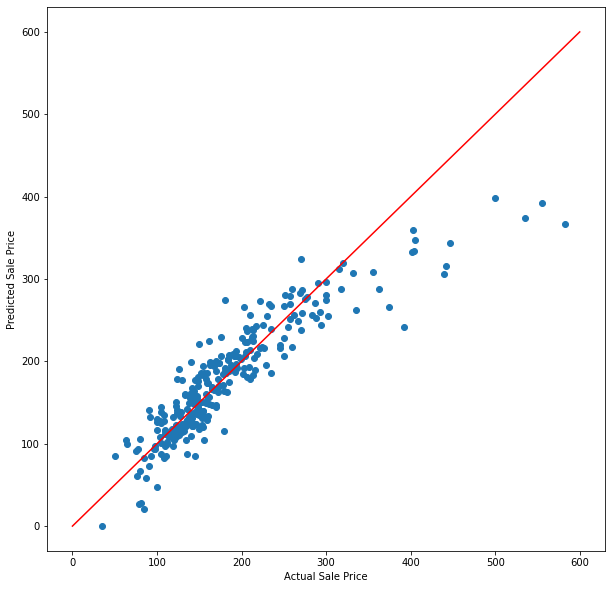

In [24]:
fig, ax = plt.subplots(figsize=(10, 10))
plt.scatter(y_test, y_pred)
x = np.linspace(0, 600, 1000)
plt.plot(x, x, color='red')
plt.xlabel("Actual Sale Price")
plt.ylabel("Predicted Sale Price")
plt.show()